# Safe Absorbing States

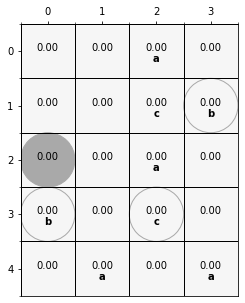

In [1]:
%matplotlib inline
from mdp import GridMDP
from oa import OmegaAutomaton
import numpy as np 
from csrl import ControlSynthesis

ltl = '(F G b | F G c) & G !a'
oa = OmegaAutomaton(ltl)
display(oa)

shape = (5,4)
structure = np.array([
['E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'T',  'E'],
['B',  'E',  'E',  'E',  'E'],
['T',  'E',  'T',  'E',  'E'],
['E',  'E',  'E',  'E',  'E']
])
label = np.array([
[(),       (),     ('a',),()],
[(),       (),     ('c',),('b',)],
[(),       (),     ('a',),()],
[('b',),   (),     ('c',),()],
[(),       ('a',), (),    ('a',)]
],dtype=np.object)
grid_mdp = GridMDP(shape=shape,structure=structure,label=label)
grid_mdp.plot()

discount=0.9999
csrl = ControlSynthesis(grid_mdp,oa,discount)

In [2]:
Q=csrl.q_learning(T=100,K=10000)

In [3]:
value=np.max(Q,axis=4)
csrl.plot(value)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=3), …

In [4]:
policy=np.argmax(Q,axis=4)
csrl.plot(value,policy)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=3), …

In [5]:
_=episode=csrl.simulate(policy,start=(0,0),T=1000)

interactive(children=(IntSlider(value=0, description='t', max=999), Output()), _dom_classes=('widget-interact'…